# Run EnergyCommunity model

This notebook describes a simple example of how to use EnergyCommunity.jl

## Initialization

### Load dependencies

In [1]:
# Activate the environment
using Pkg
Pkg.activate("..")


In [2]:
using EnergyCommunity, JuMP
using HiGHS, Plots

  ** incremental compilation may be fatally broken for this module **



### Create basic example for the Energy Community in the data folder

In [ ]:
folder = "data"
create_example_data(folder, config_name="default")

### Set input parameters

In [3]:
input_file = "$folder/energy_community_model.yml"  # Input file

output_file_isolated = "outputs/output_file_NC.xlsx"  # Output file - model users alone
output_plot_isolated = "outputs/Img/plot_user_{:s}_NC.png"  # Output png file of plot - model users alone

output_file_combined = "outputs/output_file_EC.xlsx"  # Output file - model Energy community
output_plot_combined = "outputs/Img/plot_user_{:s}_EC.pdf"  # Output png file of plot - model energy community

output_plot_sankey_agg = "outputs/Img/sankey_EC.png"  # Output plot of the sankey plot related to the aggregator case
output_plot_sankey_noagg = "outputs/Img/sankey_NC.png"  # Output plot of the sankey plot related to the no aggregator case

"../outputs/Img/sankey_NC.png"

## Optimization of the COperative (CO) Energy Community

In the following we execute the code to optimize a cooperative energy community

In [4]:
# Create the EnergyCommunity model
ECModel = ModelEC(input_file, EnergyCommunity.GroupCO(), HiGHS.Optimizer)

# build the model
build_model!(ECModel)

# optimize the model
optimize!(ECModel)

Presolving model
26568 rows, 18548 cols, 82620 nonzeros
24695 rows, 16725 cols, 83224 nonzeros
Presolve : Reductions: rows 24695(-2953); columns 16725(-2904); elements 83224(-1556)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
      27237     1.2064931899e+06 Pr: 0(0); Du: 0(1.08924e-11) 3s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 27237
Objective value     : -1.2064931899e+06
HiGHS run time      :          3.99


An Energy Community Model
Energy Community problem for a Cooperative Model
User set: ["user1", "user2", "user3"]


Solved model


In [5]:
# print summary
print_summary(ECModel)

┌ Info: List of users not specified: all users selected
└ @ EnergyCommunity g:\Il mio Drive\Universita\Dottorato\git\EnergyCommunity.jl\src\utils.jl:111



RESULTS - AGGREGATOR


NPV Agg [k€]      :  0.00e+00
SWtot [k€]        : -1.21e+03
SWus [k€]         : -1.21e+03


ESha [MWh]        :  3.70e+00


RESULTS - USER
USER              :     user1,     user2,     user3


PV                :  4.08e+01,  4.67e+01,  2.27e+01


batt              :  0.00e+00,  3.33e+00,  5.10e+00
conv              :  0.00e+00,  3.33e+00,  5.10e+00
wind              :  0.00e+00,  0.00e+00,  7.35e+01


NPV [k€]          : -5.71e+02, -2.30e+02, -4.51e+02
CAPEX [k€]        :  6.94e+01,  6.73e+01,  2.60e+02


OPEX [k€]         :  1.22e+00,  1.42e+00,  2.92e+00
YBill [k€]        : -3.30e+01, -1.07e+01, -1.26e+01


Energy flows
USER              :     user1,     user2,     user3


PtotPusP [MWh]    :  3.31e-01,  5.05e+00,  2.45e+00
PtotPusN [MWh]    :  2.24e+01,  7.70e+00,  5.63e+00


PconvP [MWh]      :  0.00e+00,  2.77e-01,  3.67e-01


PconvN [MWh]      :  0.00e+00,  3.01e-01,  3.99e-01
Pren [MWh]        :  8.46e+00,  9.54e+00,  2.13e+01


Load [MWh]        :  3.05e+01,  1.22e+01,  2.45e+01


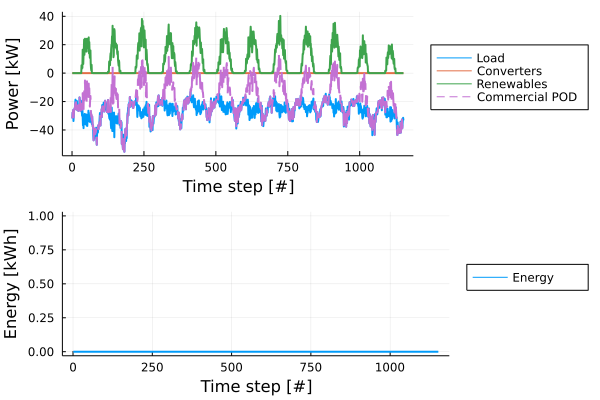

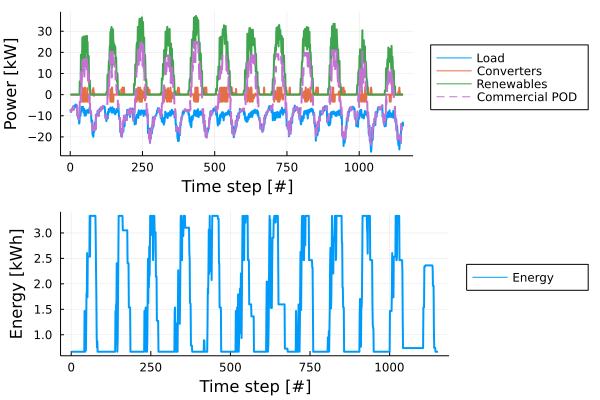

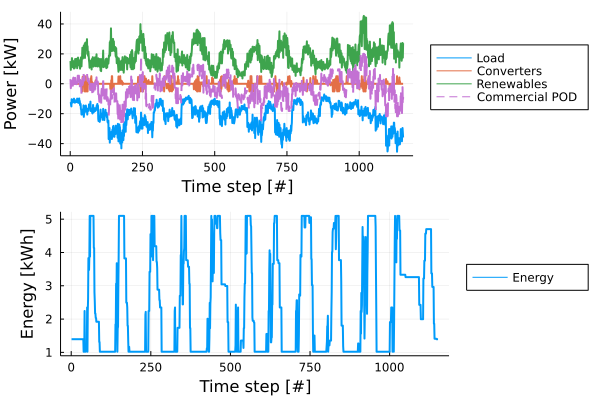

In [6]:
# plots
plot(ECModel, output_plot_combined)

In [7]:
# save summary
save_summary(ECModel, output_file_isolated)

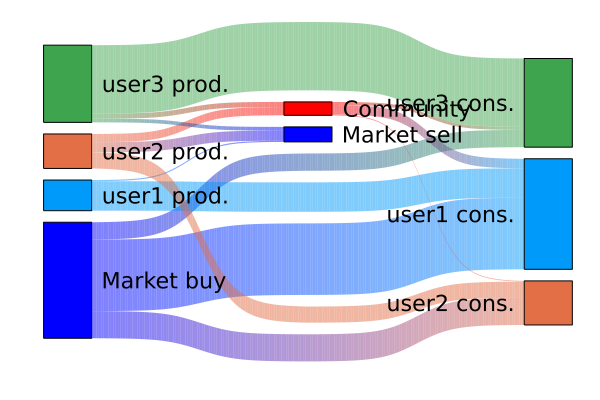

In [8]:
plot_sankey(ECModel)

## Optimization of the Non-Cooperative (NC) Energy Community

In the following we execute the code to optimize a non-cooperative energy community

In [9]:
# Create the EnergyCommunity model
NCModel = ModelEC(ECModel, EnergyCommunity.GroupNC())

# build the model
build_model!(NCModel)

# optimize the model
optimize!(NCModel)

Presolving model
23112 rows, 16244 cols, 64188 nonzeros
20751 rows, 13882 cols, 64898 nonzeros
Presolve : Reductions: rows 20751(-3441); columns 13882(-3442); elements 64898(-1450)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
      18737     1.2227418941e+06 Pr: 0(0); Du: 0(5.31681e-11) 1s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 18737
Objective value     : -1.2227418941e+06
HiGHS run time      :          1.49


An Energy Community Model
Energy Community problem for a Non-Cooperative Model
User set: ["user1", "user2", "user3"]


Solved model


In [10]:
# print summary
print_summary(NCModel)


RESULTS - AGGREGATOR
USER              :     user1,     user2,     user3


load              :  0.00e+00,  0.00e+00,  0.00e+00
PV                :  5.00e+01,  2.55e+01,  4.40e+01
batt              :  0.00e+00,  1.97e+00,  3.72e+00
conv             

 :  0.00e+00,  1.97e+00,  3.72e+00
wind              :  0.00e+00,  0.00e+00,  3.49e+01
NPV [k€]          : -5.64e+02, -2.23e+02, -4.36e+02
CAPEX [k€]        :  8.50e+01,  3.69e+01,  1.77e+02


OPEX [k€]         :  1.50e+00,  7.78e-01,  2.39e+00
YBill [k€]        : -3.16e+01, -1.22e+01, -1.72e+01


Energy flows
USER              :     user1,     user2,     user3
PtotPusP [MWh]    :  1

.09e+00,  1.38e+00,  2.26e+00
PtotPusN [MWh]    :  2.12e+01,  8.27e+00,  9.79e+00


PconvP [MWh]      :  0.00e+00,  1.18e-01,  2.81e-01


PconvN [MWh]      :  0.00e+00,  1.28e-01,  3.05e-01
Pren [MWh]        :  1.04e+01,  5.28e+00,  1.70e+01


Load [MWh]        :  3.05e+01,  1.22e+01,  2.45e+01


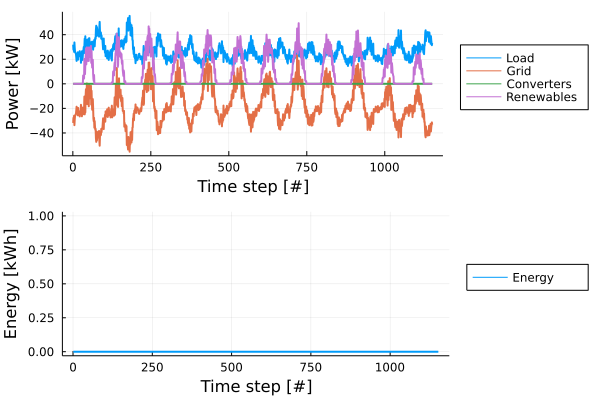

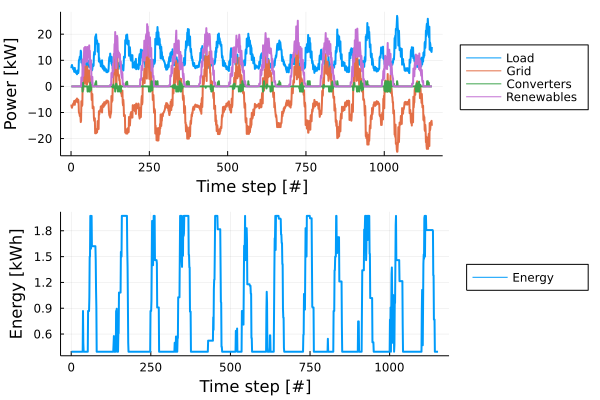

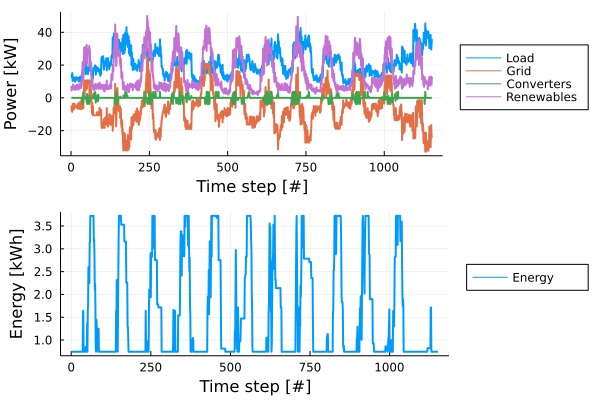

In [11]:
# plots
plot(NCModel, output_plot_isolated)

In [12]:
# save summary
save_summary(NCModel, output_file_isolated)

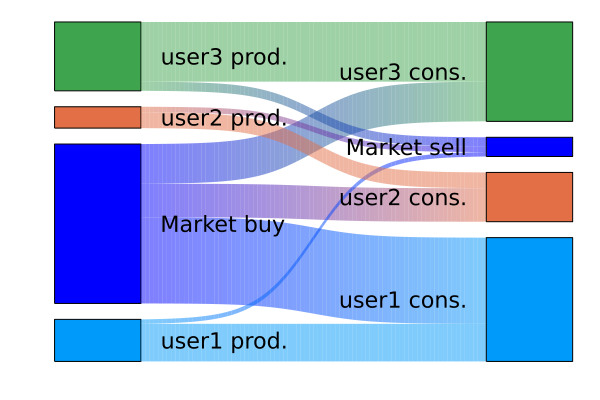

In [13]:
plot_sankey(NCModel)